In [117]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn import linear_model
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

In [118]:
df = pd.read_csv(r'C:\Users\Dell\Downloads\sulphuric acid p2.csv')

In [119]:
df

,Description,ROCK,H2SO4 TO ATTACK RCT,Defoamer,ATTACK RCT B,ATTACK RCT D,LOW LVL FLASH COOLER,TD LLFC I/L & O/L,FLTR FEED SLURRY FLOW,RTN ACD PMP DISCH FLOW,PROD ACD TO STRG TNK,PROD ACD FLOW TO STRG,CAKE WASH PMP DISCH FLOW,WEAK WASH PMP DISCH FLOW,STRONG ACD WASH TO HBF,HBF VACUUM CONTROL,HORIZ BELT FLTR CURRENT,SLURRY-SPG,FILT-SPG,FREE-ACID
0,26-12-2022 00:15,83.21,40.57,111.68,79.31,78.85,498.64,1.50,375.07,327.86,88.03,0.00,139.20,53.65,141.64,-362.03,50.62,1.435,1.28,2.38
1,26-12-2022 00:30,77.50,40.36,111.50,79.51,79.03,496.43,1.53,407.31,345.06,86.79,0.00,134.78,62.02,145.31,-397.95,53.15,1.435,1.28,2.38
2,26-12-2022 00:45,73.64,36.48,111.02,79.71,79.17,497.66,1.55,405.39,345.28,92.68,0.00,134.78,63.30,145.50,-402.08,52.88,1.435,1.28,2.38
3,26-12-2022 01:00,83.34,41.01,110.54,79.82,79.05,498.34,1.46,403.95,344.53,79.69,0.00,134.73,60.09,145.02,-394.45,52.59,1.435,1.28,2.38
4,26-12-2022 01:15,82.54,41.60,110.63,79.85,79.09,494.53,1.52,408.03,344.53,74.24,0.00,134.64,57.32,143.74,-401.38,53.02,1.435,1.28,2.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,30-12-2022 11:00,34.65,20.88,100.23,75.52,74.57,543.75,0.80,355.13,285.51,44.19,0.01,79.22,36.17,93.48,-222.54,48.08,1.400,1.28,2.41
428,30-12-2022 11:15,18.65,10.96,100.38,75.41,74.53,545.25,0.51,376.04,298.61,55.10,0.01,79.08,36.18,103.04,-241.43,48.83,1.400,1.28,2.41
429,30-12-2022 11:30,20.65,11.38,100.22,75.19,74.14,548.00,0.43,373.49,298.65,61.12,0.00,78.99,41.52,104.43,-239.22,48.48,1.400,1.28,2.41
430,30-12-2022 11:45,35.24,16.13,100.25,74.87,73.73,547.06,0.42,156.03,179.46,23.61,0.01,70.83,13.26,75.01,-110.84,26.40,1.410,1.29,2.91


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Description               432 non-null    object 
 1   ROCK                      432 non-null    float64
 2   H2SO4 TO ATTACK RCT       430 non-null    float64
 3   Defoamer                  430 non-null    float64
 4   ATTACK RCT B              430 non-null    float64
 5   ATTACK RCT D              430 non-null    float64
 6   LOW LVL FLASH COOLER      430 non-null    float64
 7   TD LLFC I/L & O/L         430 non-null    float64
 8   FLTR FEED SLURRY FLOW     430 non-null    float64
 9   RTN ACD PMP DISCH FLOW    430 non-null    float64
 10  PROD ACD TO STRG TNK      430 non-null    float64
 11  PROD ACD FLOW TO STRG     430 non-null    float64
 12  CAKE WASH PMP DISCH FLOW  430 non-null    float64
 13  WEAK WASH PMP DISCH FLOW  430 non-null    float64
 14  STRONG ACD

In [121]:
df.describe()

,ROCK,H2SO4 TO ATTACK RCT,Defoamer,ATTACK RCT B,ATTACK RCT D,LOW LVL FLASH COOLER,TD LLFC I/L & O/L,FLTR FEED SLURRY FLOW,RTN ACD PMP DISCH FLOW,PROD ACD TO STRG TNK,PROD ACD FLOW TO STRG,CAKE WASH PMP DISCH FLOW,WEAK WASH PMP DISCH FLOW,STRONG ACD WASH TO HBF,HBF VACUUM CONTROL,HORIZ BELT FLTR CURRENT,SLURRY-SPG,FILT-SPG,FREE-ACID
count,432.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,423.000000,430.000000,429.000000,432.000000,432.000000,432.000000
mean,-70.605023,30.970628,100.100442,78.422558,77.566023,445.311512,1.492977,328.949651,276.743326,63.767953,0.001605,122.317349,50.520395,134.836265,-292.749953,46.666480,1.445118,1.289634,2.582963
std,1668.648207,14.868825,38.666798,4.033290,3.894027,158.833381,0.768134,145.558589,114.739698,31.793163,0.070532,54.042120,19.897274,20.092878,129.747574,14.382846,0.026043,0.008508,0.282753
min,-19998.000000,0.010000,-1.770000,67.840000,66.720000,-3.490000,0.030000,0.060000,0.140000,0.000000,-0.860000,0.000000,0.030000,73.070000,-440.440000,-0.560000,1.370000,1.270000,2.040000
25%,53.865000,24.155000,111.202500,76.125000,75.340000,483.435000,1.172500,344.932500,272.652500,51.435000,0.000000,101.302500,38.975000,130.900000,-379.292500,49.030000,1.435000,1.285000,2.380000
50%,82.480000,36.900000,112.200000,80.315000,79.365000,493.010000,1.550000,395.680000,340.500000,71.290000,0.010000,139.565000,57.865000,144.900000,-332.370000,51.870000,1.450000,1.290000,2.580000
75%,90.757500,41.615000,114.590000,81.387500,80.390000,507.202500,1.670000,409.610000,344.150000,83.980000,0.010000,154.027500,64.925000,145.290000,-260.267500,53.850000,1.460000,1.295000,2.800000
max,116.730000,50.340000,125.030000,82.950000,82.610000,568.580000,5.560000,449.690000,347.440000,129.570000,0.430000,188.730000,78.890000,152.140000,-3.800000,60.470000,1.500000,1.310000,3.250000


In [122]:
df.isnull().sum()

Description                 0
ROCK                        0
H2SO4 TO ATTACK RCT         2
Defoamer                    2
ATTACK RCT B                2
ATTACK RCT D                2
LOW LVL FLASH COOLER        2
TD LLFC I/L & O/L           2
FLTR FEED SLURRY FLOW       2
RTN ACD PMP DISCH FLOW      2
PROD ACD TO STRG TNK        2
PROD ACD FLOW TO STRG       2
CAKE WASH PMP DISCH FLOW    2
WEAK WASH PMP DISCH FLOW    2
STRONG ACD WASH TO HBF      9
HBF VACUUM CONTROL          2
HORIZ BELT FLTR CURRENT     3
SLURRY-SPG                  0
FILT-SPG                    0
FREE-ACID                   0
dtype: int64

In [123]:
df1 = df[df['H2SO4 TO ATTACK RCT']>20]

In [124]:
df1

,Description,ROCK,H2SO4 TO ATTACK RCT,Defoamer,ATTACK RCT B,ATTACK RCT D,LOW LVL FLASH COOLER,TD LLFC I/L & O/L,FLTR FEED SLURRY FLOW,RTN ACD PMP DISCH FLOW,PROD ACD TO STRG TNK,PROD ACD FLOW TO STRG,CAKE WASH PMP DISCH FLOW,WEAK WASH PMP DISCH FLOW,STRONG ACD WASH TO HBF,HBF VACUUM CONTROL,HORIZ BELT FLTR CURRENT,SLURRY-SPG,FILT-SPG,FREE-ACID
0,26-12-2022 00:15,83.21,40.57,111.68,79.31,78.85,498.64,1.50,375.07,327.86,88.03,0.00,139.20,53.65,141.64,-362.03,50.62,1.435,1.28,2.38
1,26-12-2022 00:30,77.50,40.36,111.50,79.51,79.03,496.43,1.53,407.31,345.06,86.79,0.00,134.78,62.02,145.31,-397.95,53.15,1.435,1.28,2.38
2,26-12-2022 00:45,73.64,36.48,111.02,79.71,79.17,497.66,1.55,405.39,345.28,92.68,0.00,134.78,63.30,145.50,-402.08,52.88,1.435,1.28,2.38
3,26-12-2022 01:00,83.34,41.01,110.54,79.82,79.05,498.34,1.46,403.95,344.53,79.69,0.00,134.73,60.09,145.02,-394.45,52.59,1.435,1.28,2.38
4,26-12-2022 01:15,82.54,41.60,110.63,79.85,79.09,494.53,1.52,408.03,344.53,74.24,0.00,134.64,57.32,143.74,-401.38,53.02,1.435,1.28,2.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,30-12-2022 10:15,53.02,25.74,100.07,76.12,75.84,542.54,1.35,376.22,304.07,40.67,0.00,80.70,39.08,84.86,-236.86,48.67,1.400,1.28,2.41
425,30-12-2022 10:30,53.03,28.90,100.25,76.06,75.06,550.31,1.22,387.56,281.97,49.98,0.00,80.51,28.30,83.46,-228.04,48.27,1.400,1.28,2.41
426,30-12-2022 10:45,57.61,35.79,99.50,75.75,74.44,546.63,1.10,383.39,292.42,80.50,0.01,102.20,46.94,123.22,-256.38,48.84,1.400,1.28,2.41
427,30-12-2022 11:00,34.65,20.88,100.23,75.52,74.57,543.75,0.80,355.13,285.51,44.19,0.01,79.22,36.17,93.48,-222.54,48.08,1.400,1.28,2.41


In [125]:
df1.to_csv("df1.csv")

In [126]:
p = pd.read_csv(r'C:\Users\Dell\Documents\parameter1.1.csv')

In [127]:
p.head()

,Description,ATTACK RCT B,ATTACK RCT D,RTN ACD PMP DISCH FLOW,FREE-ACID
0,26-12-2022 00:15,79.31,78.85,327.86,2.38
1,26-12-2022 00:30,79.51,79.03,345.06,2.38
2,26-12-2022 00:45,79.71,79.17,345.28,2.38
3,26-12-2022 01:00,79.82,79.05,344.53,2.38
4,26-12-2022 01:15,79.85,79.09,344.53,2.38


In [128]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Description             343 non-null    object 
 1   ATTACK RCT B            343 non-null    float64
 2   ATTACK RCT D            343 non-null    float64
 3   RTN ACD PMP DISCH FLOW  343 non-null    float64
 4   FREE-ACID               343 non-null    float64
dtypes: float64(4), object(1)
memory usage: 13.5+ KB


In [129]:
p.describe()

,ATTACK RCT B,ATTACK RCT D,RTN ACD PMP DISCH FLOW,FREE-ACID
count,343.000000,343.000000,343.000000,343.000000
mean,79.752332,78.955248,318.316239,2.589155
std,2.660358,2.463499,58.733495,0.285723
min,67.840000,66.720000,39.670000,2.040000
25%,79.085000,78.345000,333.975000,2.380000
50%,80.930000,79.910000,342.190000,2.570000
75%,81.535000,80.560000,344.825000,2.800000
max,82.950000,82.610000,347.440000,3.250000


In [130]:
p.isnull().sum()

Description               0
ATTACK RCT B              0
ATTACK RCT D              0
RTN ACD PMP DISCH FLOW    0
FREE-ACID                 0
dtype: int64

In [131]:
p['ATTACK RCT B'].corr(p['ATTACK RCT D'])
#positive value obtained so ,positive correlation exists

0.9303100100873919

In [132]:
p.corr()
#correlation of a variable with itself is 1. 
#For that reason, all the diagonal values are 1.00   

,ATTACK RCT B,ATTACK RCT D,RTN ACD PMP DISCH FLOW,FREE-ACID
ATTACK RCT B,1.000000,0.930310,0.677505,0.135021
ATTACK RCT D,0.930310,1.000000,0.600968,0.034687
RTN ACD PMP DISCH FLOW,0.677505,0.600968,1.000000,0.032126
FREE-ACID,0.135021,0.034687,0.032126,1.000000


In [149]:
x = p['ATTACK RCT B']
y = p['ATTACK RCT D']
cl = p['FREE-ACID']
c1 = p['RTN ACD PMP DISCH FLOW']

TypeError: 'str' object is not callable

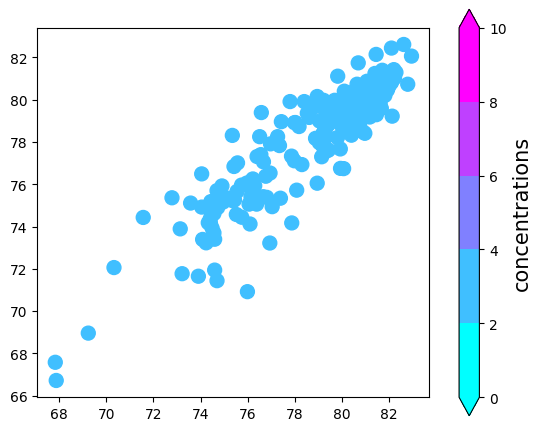

In [153]:
plt.scatter(x,y,s= 100,c = cl,cmap =plt.cm.get_cmap("cool",5))
cbar = plt.colorbar(orientation = "vertical",extend = "both",pad = 0.06,shrink =1.1)
cbar.set_label(label = "concentrations",size = 15)
plt.clim(0,10)
plt.xlabel("ATTACK RCT B")
plt.ylabel('ATTACK RCT D',fontsize = '10')
plt.show()

<AxesSubplot: >

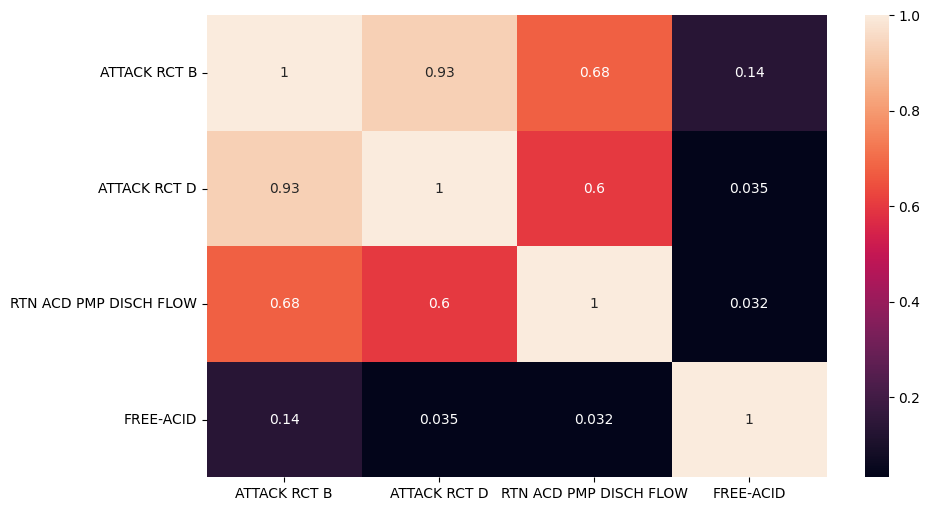

In [136]:
plt.figure(figsize = (10,6))
sns.heatmap(p.corr(),annot = True)

In [137]:
train_set,test_set = train_test_split(p,test_size=0.2,random_state = 42)

In [138]:
x1 = train_set[['ATTACK RCT B','RTN ACD PMP DISCH FLOW']]
y1 = train_set['ATTACK RCT D']
X = test_set[['ATTACK RCT B','RTN ACD PMP DISCH FLOW']]
Y = test_set['ATTACK RCT D']

In [139]:
reg =  linear_model.LinearRegression()
reg.fit(x1,y1)

LinearRegression()

In [140]:
reg.coef_

array([ 0.91591296, -0.00148298])

In [141]:
reg.intercept_

6.304998112643432

In [143]:
reg.score(x1,y1)
    

0.8781599342404548

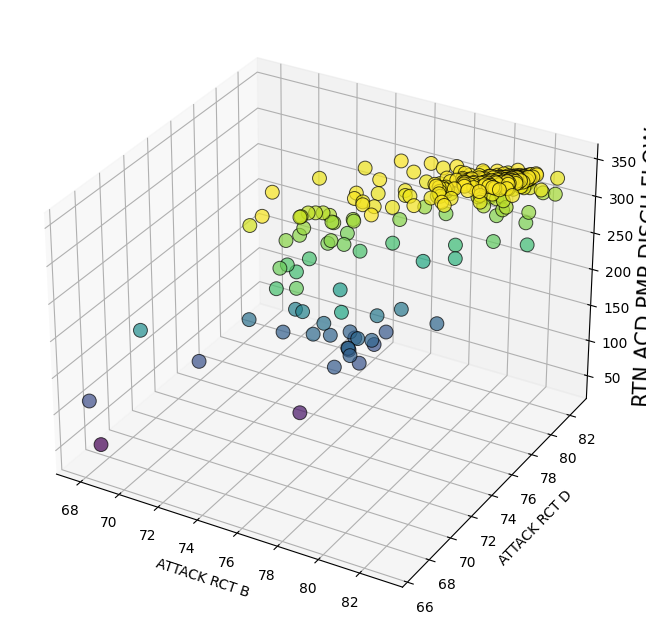

In [146]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(x,y,c1,linewidths = 0.7,alpha = 0.7,edgecolor = 'k',s =100,c=c1)
ax.set_xlabel('ATTACK RCT B',fontsize = '10')
ax.set_ylabel('ATTACK RCT D',fontsize = '10')
ax.set_zlabel('RTN ACD PMP DISCH FLOW',fontsize = '15')
plt.show()